In [2]:
# classify movie ratings into postives and negatives
# BINARY CLASSIFIER

# LOADING IMDB MOVIE REVIEWS(TEXT) DATA
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
# DECODE INPUTS 

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (value, key ) in word_index.items()])
decode_reviews = ' '.join([reverse_word_index.get(i-3,'+') for i in train_data[0]])

In [6]:
print(decode_reviews)

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + +


In [7]:
# ONE HOT ENCODING VECTORIZING THE DATA

import numpy as np
def vectorize_sequences(sequences, dimention =10000):
  results = np.zeros((len(sequences),dimention))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# VECTORIZE LABELS

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [10]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [11]:
# BUILDING MODEL OR MODEL DEFINITION
# MODEL IS HAVING 1 LAYER 2 HIDDEN LAYERS HAVING 16 HIDDEN UNITS AND 1 OUTPUT UNIT
# I > H1(16) > H2(16) > O(1)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [13]:
#  SEPERATING VALIDATION AND TRAINING SET
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val  = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,partial_y_train, batch_size=512, epochs= 20, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5219 - accuracy: 0.7919 - val_loss: 0.4263 - val_accuracy: 0.8261
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3200 - accuracy: 0.8989 - val_loss: 0.3315 - val_accuracy: 0.8737
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2374 - accuracy: 0.9248 - val_loss: 0.2881 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1865 - accuracy: 0.9383 - val_loss: 0.2753 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1530 - accuracy: 0.9530 - val_loss: 0.2801 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1257 - accuracy: 0.9607 - val_loss: 0.2928 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1026 - accuracy: 0.9710 - val_loss: 0.3066 - val_accuracy: 0.8822
Epoch 8/20
30

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

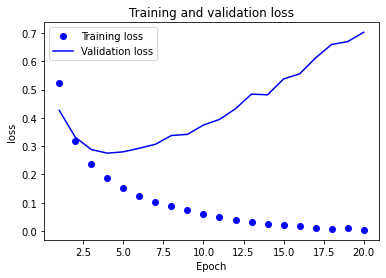

In [16]:
# PLOTTING THE TRAINING AND VALIDATION LOSS

import matplotlib.pyplot as plt
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
epochs = range(1,len(history_dict['accuracy'])+1)

plt.plot(epochs, loss_value,'bo', label = 'Training loss')
plt.plot(epochs, val_loss_value,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


In [17]:
print(len(history_dict['accuracy']))

20


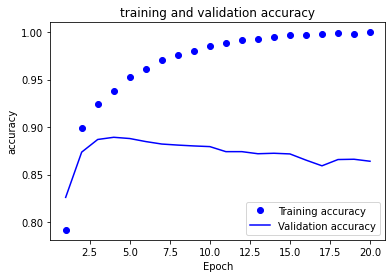

In [18]:
# PLOTTING THE ACCURACY OF TRAINING AND VALIDATION

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b',label = 'Validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [19]:
# THIS SEEMS THAT WE ARE GOING IN OVERFITTING DUE TO HIGH EPOCH SIZE
#  NOW AGAIN TRAINING THE MODEL FROM SCRATCH WITH EPOCH = 4

model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape=(10000,) ))
model.add(layers.Dense(8, activation = 'relu'))


model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4526 - accuracy: 0.8290
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2692 - accuracy: 0.9089
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2082 - accuracy: 0.9261
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2857 - accuracy: 0.8867


[0.28570371866226196, 0.886680006980896]